In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('./preprocessed_data.csv',low_memory=False)

df = df.sort_values(by='damage_property',ascending=False).reset_index(drop=True)
#del df['index']

In [2]:
damage_each_state = df.groupby('state')['damage_property','damage_crops','deaths','injuries'].sum().reset_index()
damage_each_state.sort_values(by='damage_property',ascending=False)

,state,damage_property,damage_crops,deaths,injuries
59,Texas,1.217718e+11,1.652230e+10,1940,23098
32,Louisiana,9.104024e+10,2.433341e+09,1212,3526
13,Florida,6.658761e+10,7.845153e+09,1113,6445
38,Mississippi,4.365258e+10,2.003429e+09,826,7386
44,New jersey,3.200584e+10,1.476239e+08,296,2609
...,...,...,...,...,...
57,St lawrence r,4.311767e+04,0.000000e+00,0,0
26,Lake erie,4.220203e+04,0.000000e+00,0,0
16,Gulf of alaska,4.063107e+04,0.000000e+00,0,0
27,Lake huron,0.000000e+00,0.000000e+00,0,0


In [3]:
long_lat_mean = df.groupby('state')['event_longitude','event_latitude'].sum() / df.groupby('state')['event_longitude','event_latitude'].count()
long_lat_mean

,event_longitude,event_latitude
state,,
Alabama,-86.794329,33.273120
Alaska,-148.691622,62.656039
American samoa,-170.606827,-9.855073
Arizona,-111.818135,33.593247
Arkansas,-92.645165,34.977785
...,...,...
Virginia,-78.658510,37.610194
Washington,-119.355004,47.343790
West virginia,-80.683010,38.781910


In [4]:
damage_each_state = long_lat_mean.merge(damage_each_state,  how='outer', left_on=['state'], right_on = ['state'])
damage_each_state

,state,event_longitude,event_latitude,damage_property,damage_crops,deaths,injuries
0,Alabama,-86.794329,33.273120,1.862084e+10,2.756909e+08,931,9784
1,Alaska,-148.691622,62.656039,5.248398e+08,3.128348e+05,92,127
2,American samoa,-170.606827,-9.855073,2.256566e+08,2.281014e+07,12,36
3,Arizona,-111.818135,33.593247,5.202067e+09,3.504594e+08,325,1417
4,Arkansas,-92.645165,34.977785,9.368088e+09,3.176725e+08,643,6763
...,...,...,...,...,...,...,...
63,Virginia,-78.658510,37.610194,3.568861e+09,9.497900e+08,226,1763
64,Washington,-119.355004,47.343790,1.946229e+09,8.846862e+08,272,1197
65,West virginia,-80.683010,38.781910,1.910380e+09,5.468093e+07,134,408
66,Wisconsin,-89.895524,44.194575,6.785406e+09,1.430028e+09,483,3215


In [5]:
damage_each_state['damage_property'] = (damage_each_state ['damage_property'] -damage_each_state ['damage_property'].min()) / (damage_each_state ['damage_property'].max() - damage_each_state ['damage_property'].min())
damage_each_state['damage_crops'] = (damage_each_state ['damage_crops'] -damage_each_state ['damage_crops'].min()) / (damage_each_state ['damage_crops'].max() - damage_each_state ['damage_crops'].min())
damage_each_state['deaths'] = (damage_each_state['deaths'] -damage_each_state['deaths'].min()) / (damage_each_state['deaths'].max() - damage_each_state['deaths'].min())
damage_each_state['injuries'] = (damage_each_state['injuries'] -damage_each_state['injuries'].min()) / (damage_each_state['injuries'].max() - damage_each_state['injuries'].min())

In [6]:
damage_each_state

,state,event_longitude,event_latitude,damage_property,damage_crops,deaths,injuries
0,Alabama,-86.794329,33.273120,0.152916,0.016686,0.479897,0.423586
1,Alaska,-148.691622,62.656039,0.004310,0.000019,0.047423,0.005498
2,American samoa,-170.606827,-9.855073,0.001853,0.001381,0.006186,0.001559
3,Arizona,-111.818135,33.593247,0.042720,0.021211,0.167526,0.061347
4,Arkansas,-92.645165,34.977785,0.076932,0.019227,0.331443,0.292796
...,...,...,...,...,...,...,...
63,Virginia,-78.658510,37.610194,0.029308,0.057485,0.116495,0.076327
64,Washington,-119.355004,47.343790,0.015983,0.053545,0.140206,0.051823
65,West virginia,-80.683010,38.781910,0.015688,0.003310,0.069072,0.017664
66,Wisconsin,-89.895524,44.194575,0.055722,0.086551,0.248969,0.139190


In [7]:
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [8]:
X = damage_each_state.iloc[:, [3,4,5,6]].values

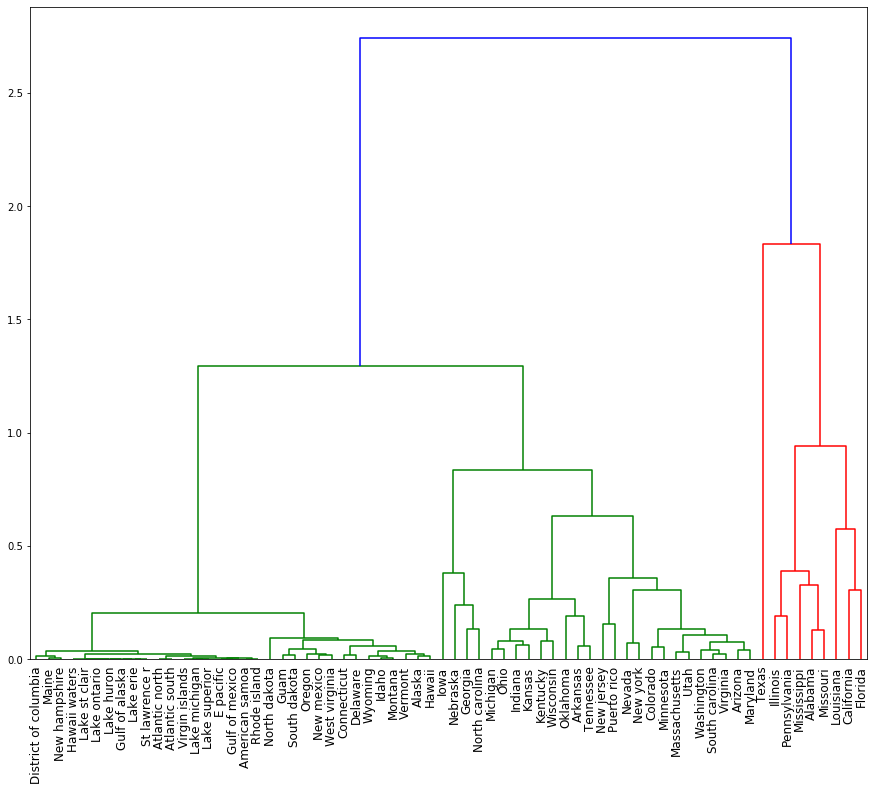

In [9]:
lbl = damage_each_state.iloc[:, 0].values
plt.figure(figsize=(15, 12))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'),leaf_rotation=90.,labels= lbl,leaf_font_size=12.)

Lets take number of clusters as 4 from the dendrogram

In [10]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_
labels

array([0, 3, 3, 1, 1, 3, 3, 0, 1, 3, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 0,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 3, 1, 1, 1, 1, 0, 0, 3, 1, 1, 3,
       1, 3, 1, 1, 3, 1, 1, 3, 0, 1, 3, 1, 3, 3, 1, 2, 1, 3, 3, 1, 1, 3,
       1, 3])

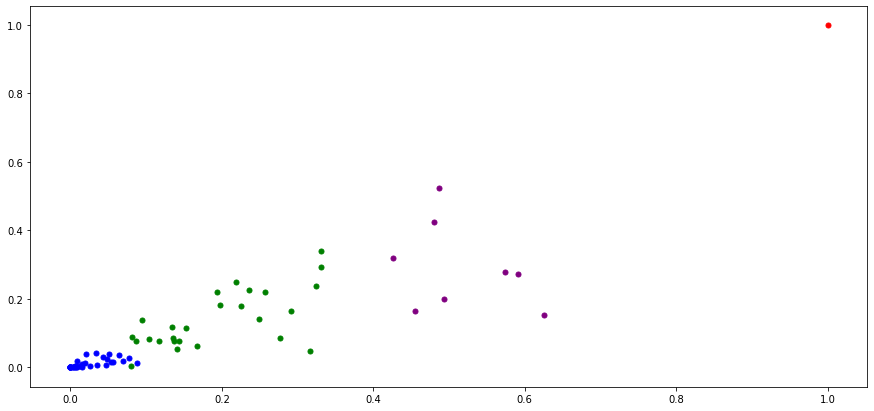

In [30]:
plt.figure(figsize=(15,7))
plt.scatter(X[labels==0, 2], X[labels==0, 3], s=25, marker='o', color='purple')
plt.scatter(X[labels==1, 2], X[labels==1, 3], s=25, marker='o', color='green')
plt.scatter(X[labels==2, 2], X[labels==2, 3], s=25, marker='o', color='red')
plt.scatter(X[labels==3, 2], X[labels==3, 3], s=25, marker='o', color='blue')
plt.show()

In [31]:
np.where(labels == 2)

(array([59]),)

In [32]:
damage_each_state.iloc[59]

state                Texas
event_longitude   -98.7248
event_latitude     32.2986
damage_property          1
damage_crops             1
deaths                   1
injuries                 1
Name: 59, dtype: object

# linkage

Single link : Distance between closest elements in clusters(produces long chains a->b->c..->z)
            
              D(c1,c2) = min D(x1,x2) where x1 Ε c1 and x2 E c2
              
Complete link: Defines the distance between farthest elements in clusters(forces spherical clusters with                                                                                  Consisent diameter)

              D(c1,c2) = max D(x1,x2) where x1 Ε c1 and x2 E c2
              
Average link: average of all pairwise distances(less affected by outliers)

              D(c1,c2) = (Sum(x1 Ε c1) Sum(x2 E c2) D(x1,x2) ) / (1 / (|c1| * |c2|))
    

wards : Consider joining two clusters, how does it change the total distance TD from centroids

     example video 
                
                
 https://www.youtube.com/watch?v=T1ObCUpjq3o average

 https://www.youtube.com/watch?v=Cy3ci0Vqs3Y complete
                
 https://www.youtube.com/watch?v=RdT7bhm1M3E single
                
                

In [14]:
dframe = pd.DataFrame({'state': damage_each_state.iloc[:,0].values, 'event_longitude': damage_each_state.iloc[:,1].values, 'event_latitude': damage_each_state.iloc[:,2].values, 'label': labels})

In [15]:
dframe

,state,event_longitude,event_latitude,label
0,Alabama,-86.794329,33.273120,0
1,Alaska,-148.691622,62.656039,3
2,American samoa,-170.606827,-9.855073,3
3,Arizona,-111.818135,33.593247,1
4,Arkansas,-92.645165,34.977785,1
...,...,...,...,...
63,Virginia,-78.658510,37.610194,1
64,Washington,-119.355004,47.343790,1
65,West virginia,-80.683010,38.781910,3
66,Wisconsin,-89.895524,44.194575,1


In [16]:
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster
from IPython.display import HTML, display

In [22]:
colors_damage = {3:'green' , 2:'red' , 1:'blue' , 0: 'purple'}

m = folium.Map(location=[30, 20], zoom_start=3)

for s,x,y,z in zip(dframe['state'],dframe['event_latitude'],dframe['event_longitude'],dframe['label']):
    folium.Circle(radius=15,
                  location=[x,y],
                  color = colors_damage[int(z)],
                  popup='state : {0}, label: {1}'.format(s,z),
                  fill=True).add_to(m)

display(m)

In [19]:
dframe

,state,event_longitude,event_latitude,label
0,Alabama,-86.794329,33.273120,0
1,Alaska,-148.691622,62.656039,3
2,American samoa,-170.606827,-9.855073,3
3,Arizona,-111.818135,33.593247,1
4,Arkansas,-92.645165,34.977785,1
...,...,...,...,...
63,Virginia,-78.658510,37.610194,1
64,Washington,-119.355004,47.343790,1
65,West virginia,-80.683010,38.781910,3
66,Wisconsin,-89.895524,44.194575,1
